In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.e

2.718281828459045

In [3]:
12//3#整除


4

In [4]:
True and False

False

In [5]:
a="我爱好美女"

In [6]:
a*3


'我爱好美女我爱好美女我爱好美女'

In [7]:
#还可以拼接
type(a)

str

In [8]:
None

In [9]:
float('-inf')#负无穷

-inf

In [10]:
float('-inf')+float('inf')

nan

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize
from sklearn.metrics import classification_report#这个包是评价报告

In [12]:
train=pd.read_csv(r'F:\h\kaggle\train.csv')
test=pd.read_csv(r'F:\h\kaggle\test.csv')

In [14]:
data=pd.read_csv('F:\h\福大第一学期数据\TABLE33219.csv')

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train['Survived'].groupby([train['Pclass'],train['Sex']]).mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [17]:
data.head()

,ID,JSZH,WFDZ,WFNR,CLSJ,JKBJ,WFSJ,WFBH
0,0000348969E67364B1B617DC8C27175B,350111197001230411,卢滨路金洲路口北向,在高速公路或城市快速路以外的道路上行驶时，驾驶人未按规定使用安全带的,2017/10/11 11:24:40,1,2017/10/7 17:20:10,3501022017121431017431
1,00003DD66542E4FFBED40D44BE3149EA,350303199208311016,华林路五四路口,非机动车未在非机动车道内行驶,2017/11/29 9:45:00,1,2017/11/29 9:45:00,3501022017121351655271
2,000059588C9529CFD4E22CFC7FE741AD,350111197012110597,省妇幼保健院口监控范围,机动车违反禁令标志指示的,2017/5/2 9:42:49,已交款,2017/4/18 8:44:55,3501032017131415254381
3,000062455B2719AAEBE31CBE64E69B2B,230281199910290928,北二环路华林路口,实行登记的非机动车违反规定载人的,2017/9/20 16:38:00,0,2017/9/20 16:38:00,3501112017111350640451
4,0000682BA564A316898B4525A0309A37,360735199109121932,南江滨路（鳌峰大桥下至鼓山大桥下）,非机动车未在非机动车道内行驶,2017/10/27 10:02:00,1,2017/10/27 10:02:00,3501042017141350874361


In [18]:
#处理时间特征
data['WFSJ'] = pd.to_datetime(data['WFSJ'],format='%Y-%m-%d %H:%M:%S')
data["weekday"]=data["WFSJ"].dt.weekday
data["year"]=data["WFSJ"].dt.year
data["quarter"]=data["WFSJ"].dt.quarter
data["hour"]=data["WFSJ"].dt.hour
data["month"]=data["WFSJ"].dt.month
data["day"]=data["WFSJ"].dt.day

In [19]:
import os
os.chdir(r'F:\h\kaggle')#工作路径改为当前

In [20]:
data.tail(5)

,ID,JSZH,WFDZ,WFNR,CLSJ,JKBJ,WFSJ,WFBH,weekday,year,quarter,hour,month,day
1059965,SIRC-sgat-25699877t-20170220-3-0005170,无,南二环路（鹭岭路至浦上大道）,非机动车未在非机动车道内行驶,2017/1/26 8:41:00,已交款,2017-01-26 08:41:00,3501042017141350280121,3,2017,1,8,1,26
1059966,SIRC-sgat-25699877t-20170220-3-0005171,无,南二环路（鹭岭路至浦上大道）,非机动车未在非机动车道内行驶,2017/1/26 8:41:00,已交款,2017-01-26 08:41:00,3501042017141350280131,3,2017,1,8,1,26
1059967,SIRC-sgat-25699877t-20170220-3-0005172,无,南二环路（鹭岭路至浦上大道）,非机动车未在非机动车道内行驶,2017/1/26 8:41:00,已交款,2017-01-26 08:41:00,3501042017141350280111,3,2017,1,8,1,26
1059968,SIRC-sgat-25699877t-20170220-3-0005174,352227197701114516,八一七路仁德路口东向,机动车驾驶人违反指示标志、标线通行,2017/1/30 20:46:21,已交款,2017-01-26 08:41:20,3501002017101902194871,3,2017,1,8,1,26
1059969,SIRC-sgat-25699877t-20170220-3-0005175,650300197208155415,福飞路新园路口南向,机动车通过有灯控路口时，不按所需行进方向驶入导向车道,2017/2/3 15:09:45,已交款,2017-01-26 08:41:25,3501022017121426801941,3,2017,1,8,1,26


In [21]:
data.size

14839580

In [22]:
data[['ID','JSZH','WFNR']][:50]

,ID,JSZH,WFNR
0,0000348969E67364B1B617DC8C27175B,350111197001230411,在高速公路或城市快速路以外的道路上行驶时，驾驶人未按规定使用安全带的
1,00003DD66542E4FFBED40D44BE3149EA,350303199208311016,非机动车未在非机动车道内行驶
2,000059588C9529CFD4E22CFC7FE741AD,350111197012110597,机动车违反禁令标志指示的
3,000062455B2719AAEBE31CBE64E69B2B,230281199910290928,实行登记的非机动车违反规定载人的
4,0000682BA564A316898B4525A0309A37,360735199109121932,非机动车未在非机动车道内行驶
5,00007DFE12DD217EDC96BB6E537B9132,350783198204040238,汽车在道路上违反规定停放且驾驶人不在现场，妨碍其他车辆、行人通行的
6,00008D3E2101403076815E3D0AB5B769,612301196810020421,机动车违反禁令标志指示的
7,0000A0D68F07258DADE746E06EBFAA5D,513030199905184257,实行登记的非机动车未悬挂或者未按规定悬挂非机动车号牌的
8,0000AB4664458105D777E57FC4F9CD43,350121198710274238,汽车在道路上违反规定停放且驾驶人不在现场，妨碍其他车辆、行人通行的
9,0000B0D821BB03CE1E934FD7967C7C04,513030197306013713,非机动车未在非机动车道内行驶


In [23]:
data.columns

Index(['ID', 'JSZH', 'WFDZ', 'WFNR', 'CLSJ', 'JKBJ', 'WFSJ', 'WFBH', 'weekday',
       'year', 'quarter', 'hour', 'month', 'day'],
      dtype='object')

In [24]:
data.loc[7:15,['JSZH','WFNR']]

,JSZH,WFNR
7,513030199905184257,实行登记的非机动车未悬挂或者未按规定悬挂非机动车号牌的
8,350121198710274238,汽车在道路上违反规定停放且驾驶人不在现场，妨碍其他车辆、行人通行的
9,513030197306013713,非机动车未在非机动车道内行驶
10,无,行人违反交通信号通行
11,420222198801201034,在高速公路或城市快速路以外的道路上行驶时，驾驶人未按规定使用安全带的
12,350102197306030406,机动车违反规定使用专用车道
13,350784198805273711,非机动车未在非机动车道内行驶
14,440184198110034510,机动车驾驶人违反指示标志、标线通行
15,341222198712268756,实行登记的非机动车违反规定载人的


In [25]:
data.loc[[7,15],['JSZH','WFNR']]

,JSZH,WFNR
7,513030199905184257,实行登记的非机动车未悬挂或者未按规定悬挂非机动车号牌的
15,341222198712268756,实行登记的非机动车违反规定载人的


In [26]:
#loc可以写条件
data_1=data.loc[data['WFNR']=='驾驶机动车违反道路交通信号灯通行的',['WFNR','hour','month']]#筛选满足条件的所有行和列

In [27]:
data_1['hour'].value_counts()#这里阙歌图

14    2730
15    2552
13    2464
16    2388
11    2370
10    2369
12    2352
9     2294
17    2043
8     1954
18    1836
19    1563
7     1517
21    1480
20    1449
22    1265
23    1046
6      968
0      675
1      579
5      507
2      411
3      334
4      279
Name: hour, dtype: int64

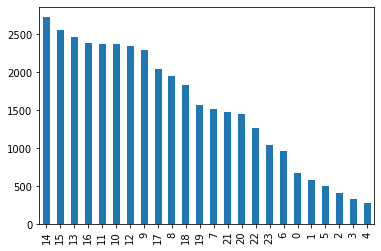

In [29]:
data_1['hour'].value_counts().plot.bar()

In [ ]:
data.iloc[[3],5:8]#按照位置选取

In [ ]:
data.iloc[0:2]  data.loc[0:2] #loc 取得是标签，iloc是按照位置来取，loc会比他多一行

In [ ]:
# data.loc[0:2]

In [ ]:
data['hour'].value_counts()

In [ ]:
#条件查询

In [ ]:
data[['JSZH','hour','WFNR']][(data['hour']==9)&(data['JSZH']=='350303199208311016')]

In [ ]:
data[['JSZH','hour','WFNR']][data['hour'].between(9,10,inclusive=True)]

In [ ]:
data[['JSZH','hour','WFNR']][data['JSZH'].isin(['无'])]

In [ ]:
data_2=data[~data['JSZH'].isin(['无'])]


In [ ]:
list_=[]
for x in data_2['JSZH'].values:
    if len(x)>8:
        list_.append(str(x[6:10]))
    else:
        list_.append(str(x[0:4]))

In [ ]:
'62(0' in list_

In [ ]:
list_[28287]='0'

In [ ]:
data_2.loc[[28288],['JSZH']]

In [ ]:
data.rename(columns={'JSZH':'indety'},inplace=True)

In [ ]:
data

In [ ]:
s = 'adfatggfa43 534k/009r=-93 46456w554xgtrghji876rzsra'

In [ ]:
import re

In [ ]:
re.findall('t',s)


In [ ]:
re.findall('t..',s)


In [ ]:
re.findall(' *(3[0-9][a-z])',s)#只要括号里面的，括号外面如果有空格的话可以删,*前面表示可以有空格也可以没有，也可以有很多的空格

In [ ]:
re.findall(' *(3[0-9][a-z])|(a[0-9][a-z])',s)

In [ ]:
list_1=data['indety'].values

In [ ]:
re.findall('\d+',s)#  +表示至少有一个数字，\d表示有一个数字

In [ ]:
re.findall('\d{2}',s)#表示匹配几个

In [ ]:
for i in list_1:
    rusult=re.findall('[0-9]\([0-9]',i)

In [ ]:
data_2.shape

In [ ]:
data_2['indety']=data['indety'].str.findall('[0-9]+',flags=re.IGNORECASE)

In [ ]:
data_2['indety']

In [ ]:
data_3=data[~data['indety'].isin(['无'])]

In [ ]:
data_3.shape

In [ ]:
data_3['JSZH']=data_3['indety'].str.findall('[0-9]+')

In [ ]:
# data_3.drop(['Indetity','JSZH1'],axis=1,inplace=True)

In [ ]:
tianqi = pd.read_csv(r"F:\h\kaggle\福州2017年天气.csv",encoding= 'gb18030')

In [ ]:
tianqi.head()

In [ ]:
tianqi['日期'] = pd.to_datetime(tianqi['日期'],format='%Y-%m-%d ')
tianqi["year"]=tianqi["日期"].dt.year
tianqi["month"]=tianqi["日期"].dt.month
tianqi["day"]=tianqi["日期"].dt.day


In [ ]:
# df = pd.merge(data,tianqi,left_on=['month','day'],right_on=['month','day'],how='left')